# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

# Contents <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
* [Etapa 2. Trabajar con valores ausentes](#missing_values) 

## Etapa 1. Descripción de los datos <a id='data_review'></a>

In [3]:
# Cargardo todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargar datos

In [4]:
# Carga el archivo de datos en un DataFrame
sale_of_vehicle = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 3(terminado)/vehicles_us.csv")

Exploración de datos
---

El dataset contiene los siguientes campos:
- `price` - precio.
- `model_year` - año del modelo
- `model` - modelo
- `condition` - condición
- `cylinders` - cantidad de cilindros
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` - transmisión
- `paint_color` - color de pintura
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [5]:
# imprime la información general/resumida sobre el DataFrame
sale_of_vehicle.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
# imprimir una muestra de datos
sale_of_vehicle.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Tenemos 13 columnas y 51525 filas. 
Anlizando la info del dataframe podemos detectar los siguientes problemas en algunas columnas. 
Faltan valores en las columnas **"model_year"**, **"cylinders"**, **"odometer"**, **"paint_color"** y **"is_4wd"**. Y podria ser que la columna **"is_4wd"** deba ser booleana.

**Descripción de los datos**
- `price` - no presenta problemas obvios.
- `model_year` - presenta valores ausentes y el tipo no es el adecuado deberia ser int.
- `model` - no presenta problemas obvios.
- `condition` - no presenta problemas obvios.
- `cylinders` - presenta valores ausentes y el tipo no es el adecuado deberia ser int.
- `fuel` - no presenta problemas obvios.
- `odometer` - presenta valores ausentes y el tipo no es el adecuado deberia ser int.
- `transmission` - no presenta problemas obvios.
- `type` - las cadenas no están normalizadas. Hay que normalizar los valores de las cadenas.
- `paint color` - presenta valores ausentes.
- `is_4wd` - presenta valores ausentes y el tipo no es el adecuado deberia ser booleana.
- `date_posted` - La columna **"date_posted"** debe ser de tipo datetime y no int64; ya que estamos hablando de fechas y no de numeros enteros.
- `days_listed` - no presenta problemas obvios.

Hemos analizado y tenemos una descripción general del dataframe. Hemos detectado algunos problemas con algunas de las columnas que vamos a intentar solucionar durante el proyecto.

[Volver a Contenidos](#back)

## Etapa 2. Tratar los valores ausentes <a id='missing_values'></a>

Trabajar con los valores ausentes de la columna **"is_4wd"**

Aun asi aun nos quedan algunas columnas las cuales presentan valores ausentes los cuales debemos rellenar de la manera mejor tratable segun sea, ademas siendo observadores podemos ver que la columna con mayor numero de valores ausentes es la de "is_4wd" con 25953 

In [7]:
sale_of_vehicle["is_4wd"].isna().sum()

25953

In [8]:
sale_of_vehicle["is_4wd"].unique()

array([ 1., nan])

Tenemos 1 y NaN. Esta columna nos dice si el coche es 4x4 o no.
Asi que trabajaremos con esta columna convirtiendo los valores ausentes de la manera que usaremos el metodo .where() de tal manera que sustituiremos los valores ausentes por 0 y asi tendremos solo dos valores unicos 1 si es 4x4 y 0 indicandonos que no es 4x4. 
Después de lo cual podemos convertir la columna a una columna booleana, 1 se convertirá en "True" y 0 se convertirá en "False".

In [9]:
#esto introduce 0 en la columna "is_4wd" con el metodo .where() siempre que el valor NO sea igual a 1
sale_of_vehicle['is_4wd'] = sale_of_vehicle['is_4wd'].where(sale_of_vehicle['is_4wd'] == 1, 0)

#convierte los valores de la columna is_4wd en valores booleanos
sale_of_vehicle['is_4wd'] = sale_of_vehicle['is_4wd'].astype('bool')

#nos muestra los valores únicos de la columna is_4wd
sale_of_vehicle['is_4wd'].unique()

array([ True, False])

In [10]:
sale_of_vehicle["is_4wd"].isna().sum()

0

Ya no tenemos valores ausentes en esta columna y la columna se ha convertido en booleana para un analisis del dataframe mas eficiente.

---

Trabajar con los valores ausentes de la columna **"model_year"**

In [11]:
#Generar estadísticas descriptivas de la columna "model_year"
sale_of_vehicle["model_year"].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Utilizaremos la mediana. La columna(**"model_year"**) puede deducirse a partir de la columna(**"model"**) y la columna (**"condition"**). Asi que haremos una agrupacion de columnas **"model"** y **"condition"** para sacar la mediana mas conveniente y usaremos el metodo .to_dict y asi rellenar los valores ausentes de la columna **"model_year"**

A continuación, podemos aplicar una función que compruebe si existen valores ausentes en nuestras filas de la columna **"model_year"**. Una vez encontrados los sustituira por la mediana de la agrupacion de las mecionadas columnas.

In [12]:
median_model_year = sale_of_vehicle.groupby(['model', 'condition'])['model_year'].median().to_dict()
def model_year_missing_values(row):
    if np.isnan(row['model_year']):
        return median_model_year.get((row['model'], row['condition']))
    return row['model_year']

sale_of_vehicle['model_year'] = sale_of_vehicle.apply(model_year_missing_values, axis=1)
sale_of_vehicle.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [13]:
sale_of_vehicle[sale_of_vehicle['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,False,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,True,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,False,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,True,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,True,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,True,2019-04-10,35


In [14]:
sale_of_vehicle["model_year"].isna().sum()

6

In [15]:
#se procede a eliminar los pocos valores ausentes
sale_of_vehicle = sale_of_vehicle.dropna(subset=["model_year"]).reset_index(drop=True)
sale_of_vehicle['model_year'].isna().sum()

0

No tenemos valores ausentes en la columna model_years

---

Trabajar con los valores ausentes de la columna **"odometer"**

In [16]:
#Generar estadísticas descriptivas de la columna "odometers"
sale_of_vehicle["odometer"].describe()

count     43628.000000
mean     115556.184010
std       65094.063831
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

- Con una desviación típica tan alta de (std = 65094.611), nos inclinamos por utilizar la mediana.
- Así que tenemos que rellenar los valores ausentes de la columna **"odometer"** que faltan con una mediana basada en la columna **"model_year"** y la columna **"condition"** .
- Podemos crear un agrupación de nuestras columnas por **'model_year'** y **'condition'** y calcular la mediana del kilometraje de cada combinación de sus valores.
-  A continuación, podemos aplicar una función que compruebe si existen valores ausentes en nuestras filas de la columna **"odometer"**. Cuando encuentre uno, comprobará el año del modelo y la condición y, a continuación, devolverá el valor mediano de la columna **"odometer"** para la combinación año del modelo y condición de nuestros datos agrupados ya anteriormente.

In [17]:
#esto agrupa los 'datos' por la columna "model_year" y "condition", y calcula la mediana de las lecturas del odometer
#y con el metodo .to_dict() que convierte el dataframe resultante en un diccionario con el nombre de la variable: median_mileage
median_mileage = sale_of_vehicle.groupby(['model_year', "condition"])['odometer'].median().to_dict()


def odometer_missing_values(row):
    if np.isnan(row['odometer']): 
        return median_mileage.get((row['model_year'], row['condition']))
    return row['odometer']
    
#aplica la función odometer_missing_values a la columna "odometer" de nuestro dataframe para efectuar los cambios
sale_of_vehicle['odometer'] = sale_of_vehicle.apply(odometer_missing_values, axis=1)

In [18]:
# se llama al metodo info para ver el cambio de tipo de la columna "odometer"
sale_of_vehicle.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51519 entries, 0 to 51518
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51519 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51519 non-null  object 
 3   condition     51519 non-null  object 
 4   cylinders     46260 non-null  float64
 5   fuel          51519 non-null  object 
 6   odometer      51512 non-null  float64
 7   transmission  51519 non-null  object 
 8   type          51519 non-null  object 
 9   paint_color   42253 non-null  object 
 10  is_4wd        51519 non-null  bool   
 11  date_posted   51519 non-null  object 
 12  days_listed   51519 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [19]:
sale_of_vehicle[sale_of_vehicle['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21418,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,False,2018-12-15,18
28004,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,NaN,False,2018-11-03,41
31801,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,False,2019-03-31,46
33252,4500,1963.0,chevrolet impala,fair,NaN,gas,NaN,automatic,sedan,NaN,False,2019-03-17,38
33902,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,False,2018-06-24,25
45689,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,False,2018-11-18,59
46906,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,False,2018-11-08,23


In [20]:
sale_of_vehicle["odometer"].isna().sum()

7

In [21]:
#se procede a eliminar los pocos valores ausentes
sale_of_vehicle = sale_of_vehicle.dropna(subset=["odometer"]).reset_index(drop=True)
sale_of_vehicle['odometer'].isna().sum()

0

In [22]:
# se hace una comprobacion de que ya no tenemos valores ausentes
sale_of_vehicle[sale_of_vehicle['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


No tenemos valores ausentes en la columna odometer

---

Trabajar con los valores ausentes de la columna **"cylinders"**

In [23]:
#Generar estadísticas descriptivas de la columna "cylinders"
sale_of_vehicle["cylinders"].describe()

count    46254.000000
mean         6.125178
std          1.660302
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

De nuevo utilizaremos la mediana.
tenemos que tener en cuenta que el número de cilindros la columna (**"cylinders"**) depende del modelo de coche la columna (**"model"**).
Aplicaremos el mismo principio que con la columna del **"model_year"** haremos una agrupación para sacar la mediana mas conveniente y asi rellenar los valores ausentes.

In [24]:
#esto agrupa los 'datos' por las columnas "model" y calcula la mediana de la columna "cylinders" 
# y con el metodo .to_dict() que convierte el dataframe resultante en un diccionario con el nombre de la variable: median_cylinders
median_cylinder = sale_of_vehicle.groupby('model')['cylinders'].agg(pd.Series.mode).to_dict()

def cylinders_missing_values(row):
    if np.isnan(row['cylinders']):
        return median_cylinder.get(row['model'])
    return row['cylinders']

#aplica la función cylinders_missing_values a la columna "cylinders" de nuestro dataframe para efectuar los cambios    
sale_of_vehicle['cylinders'] = sale_of_vehicle.apply(cylinders_missing_values, axis=1)




In [25]:
# se llama al metodo info para ver el cambio de tipo de la columna "odometer"
sale_of_vehicle.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51512 entries, 0 to 51511
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51512 non-null  int64  
 1   model_year    51512 non-null  float64
 2   model         51512 non-null  object 
 3   condition     51512 non-null  object 
 4   cylinders     51512 non-null  float64
 5   fuel          51512 non-null  object 
 6   odometer      51512 non-null  float64
 7   transmission  51512 non-null  object 
 8   type          51512 non-null  object 
 9   paint_color   42248 non-null  object 
 10  is_4wd        51512 non-null  bool   
 11  date_posted   51512 non-null  object 
 12  days_listed   51512 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [26]:
sale_of_vehicle["cylinders"].isna().sum()

0

In [27]:
sale_of_vehicle[sale_of_vehicle['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


No tenemos valores ausentes en la columna cylinders

---

Trabajar con los valores ausentes de la columna **"paint_color"**


In [28]:
sale_of_vehicle["paint_color"].describe()

count     42248
unique       12
top       white
freq      10025
Name: paint_color, dtype: object

In [29]:
sale_of_vehicle["paint_color"].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [30]:
sale_of_vehicle['paint_color'] = sale_of_vehicle['paint_color'].fillna("unknown")

In [31]:
sale_of_vehicle["paint_color"].value_counts().sort_values()

purple       102
orange       231
yellow       255
custom      1153
brown       1223
green       1395
red         4420
blue        4475
grey        5037
silver      6242
black       7690
unknown     9264
white      10025
Name: paint_color, dtype: int64

---

## Corregir los tipos de datos

corregir la columna **"date_posted"**

Comenzaremos haciendo el cambio de la columna "date_posted" de tipo objeto a tipo datetime y utilizaremos el método pd.to_datetime(). Hemos tenido en cuenta que esas fechas están escritas en el formato: **aaaa-mm-dd**. Esto hay que reflejarlo a la hora de utilizar el método. Para ello, pasaremos un parámetro llamado **'format'** y le daremos el valor **'%Y-%m-%d'**

In [32]:
#cambia el tipo de datos de la columna "date_posted" a tipo fecha-hora reflejando el formato existente
sale_of_vehicle['date_posted'] = pd.to_datetime(sale_of_vehicle['date_posted'], format='%Y-%m-%d')
# se llama al metodo info para ver el cambio de tipo de la columna "date_poste"
sale_of_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51512 entries, 0 to 51511
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51512 non-null  int64         
 1   model_year    51512 non-null  float64       
 2   model         51512 non-null  object        
 3   condition     51512 non-null  object        
 4   cylinders     51512 non-null  float64       
 5   fuel          51512 non-null  object        
 6   odometer      51512 non-null  float64       
 7   transmission  51512 non-null  object        
 8   type          51512 non-null  object        
 9   paint_color   51512 non-null  object        
 10  is_4wd        51512 non-null  bool          
 11  date_posted   51512 non-null  datetime64[ns]
 12  days_listed   51512 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


Comprobamos el cambiado con éxito el tipo de valor de la columna a datetime

---

Corregir la columna **"type"**

In [33]:
sale_of_vehicle["type"].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [34]:
#esto hace que todos los valores de cadena de la columna "tipo" estén en minúsculas
sale_of_vehicle['type'] = sale_of_vehicle['type'].str.lower() 

#mostar todos los valores unicos en la columna "type"
sale_of_vehicle['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Quedo arreglado la normalización de la columna "type" con éxito.

---

Los columnas **"cylinders"**, **"odometer"** y **"model_year"**, deben trasformarse a "int64".

In [35]:
sale_of_vehicle['cylinders'] = sale_of_vehicle['cylinders'].astype(int)

In [36]:
sale_of_vehicle['odometer'] = sale_of_vehicle['odometer'].astype(int)

In [37]:
sale_of_vehicle['model_year'] = sale_of_vehicle['model_year'].astype(int)

In [38]:
sale_of_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51512 entries, 0 to 51511
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51512 non-null  int64         
 1   model_year    51512 non-null  int32         
 2   model         51512 non-null  object        
 3   condition     51512 non-null  object        
 4   cylinders     51512 non-null  int32         
 5   fuel          51512 non-null  object        
 6   odometer      51512 non-null  int32         
 7   transmission  51512 non-null  object        
 8   type          51512 non-null  object        
 9   paint_color   51512 non-null  object        
 10  is_4wd        51512 non-null  bool          
 11  date_posted   51512 non-null  datetime64[ns]
 12  days_listed   51512 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 4.2+ MB


## Enriquecer datos

In [39]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
#Esto calcula el día de la semana a partir de los valores de date_posted y los guarda en la nueva columna weekday
sale_of_vehicle['weekday'] = sale_of_vehicle['date_posted'].dt.day_name()
#Esto calcula el mes a partir de los valores de date_posted y los guarda en la nueva columna month
sale_of_vehicle['month'] = sale_of_vehicle['date_posted'].dt.month_name()
#Esto calcula el año a partir de los valores de date_posted y los guarda en la nueva columna year
sale_of_vehicle['year'] = sale_of_vehicle['date_posted'].dt.year
sale_of_vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003,ford f-150,fair,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019


In [40]:
# Agrega los años del vehículo cuando el anuncio se colocó
sale_of_vehicle['years_of_the_vehicle_posted'] = sale_of_vehicle['year'] - sale_of_vehicle['model_year']
sale_of_vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6
3,1500,2003,ford f-150,fair,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2


In [41]:
# Agrega el millaje promedio del vehículo por año
sale_of_vehicle['years_of_the_vehicle_posted']= sale_of_vehicle['years_of_the_vehicle_posted'].replace(0, 1)
sale_of_vehicle['average_vehicle_mileage'] = sale_of_vehicle['odometer'] / sale_of_vehicle['years_of_the_vehicle_posted']
sale_of_vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


In [42]:
sale_of_vehicle["condition"].value_counts()

excellent    24772
good         20144
like new      4741
fair          1605
new            138
salvage        112
Name: condition, dtype: int64

Modificación de los valores de la columna "condición
Ahora queremos cambiar los valores de la columna "condición". Las instrucciones son: "nuevo" = 5, "como nuevo" = 4, "excelente" = 3, "bien" = 2, "bastante" = 1, "para rescate" = 0

In [43]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
condition_dict = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
sale_of_vehicle['condition'] = sale_of_vehicle['condition'].map(condition_dict)

#convertir el tipo de dato de la columna de tipo objeto a entero
sale_of_vehicle['condition'] = sale_of_vehicle['condition'].astype('int')
sale_of_vehicle['condition'].sort_values().unique()



array([0, 1, 2, 3, 4, 5])

Conclusión
Hemos calculado y añadido correctamente las columnas **"weekday**, **"month"**, **"year"**, **"average_vehicle_mileage"** y **"years_of_the_vehicle_posted"**. También hemos cambiado con éxito los valores de **"condición"** por los números correspondientes

## Comprobar datos limpios

In [44]:
# imprime la información general/resumida sobre el DataFrame
sale_of_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51512 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        51512 non-null  int64         
 1   model_year                   51512 non-null  int32         
 2   model                        51512 non-null  object        
 3   condition                    51512 non-null  int32         
 4   cylinders                    51512 non-null  int32         
 5   fuel                         51512 non-null  object        
 6   odometer                     51512 non-null  int32         
 7   transmission                 51512 non-null  object        
 8   type                         51512 non-null  object        
 9   paint_color                  51512 non-null  object        
 10  is_4wd                       51512 non-null  bool          
 11  date_posted                  51512 non-nu

In [45]:
# imprimir una muestra de datos
sale_of_vehicle.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,suv,black,True,2019-01-07,68,Monday,January,2019,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,suv,unknown,True,2018-07-16,19,Monday,July,2018,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,suv,blue,True,2019-02-15,17,Friday,February,2019,11,13381.000000


## Estudiar parámetros principales


Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

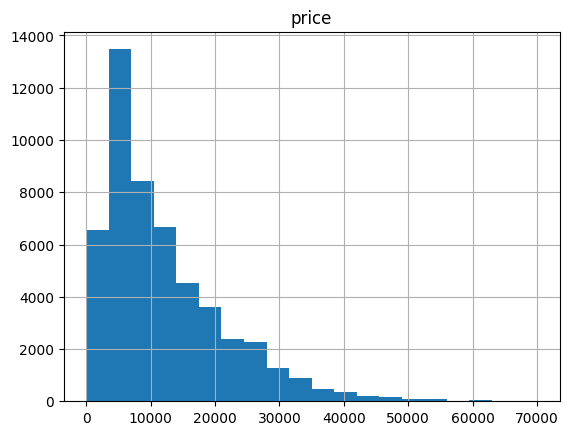

In [46]:
#traza un histograma para la columna 'precio' con 20 intervalos y el eje x de (0, 70000)
sale_of_vehicle['price'].hist(bins=20, range=(0, 70000))
#le agregamos el titulo  de la columna que estamos analizando "price"
plt.title('price')
#mostramos el histograma
plt.show()



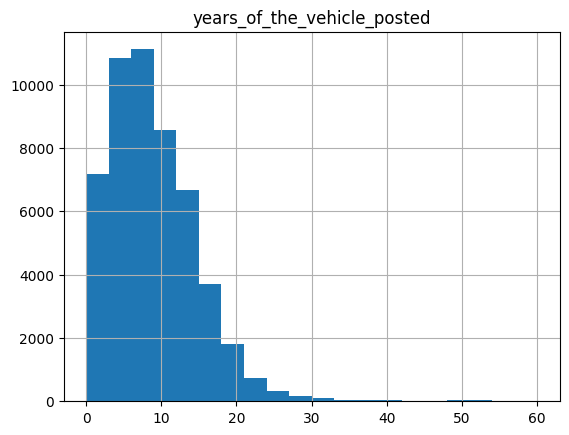

In [47]:
#traza un histograma para la columna 'years_of_the_vehicle_posted' con 20 intervalos y el eje x de (0, 60)
sale_of_vehicle['years_of_the_vehicle_posted'].hist(bins=20, range=(0, 60))
#le agregamos el titulo  de la columna que estamos analizando "years_of_the_vehicle_posted"
plt.title('years_of_the_vehicle_posted')
#mostramos el histograma
plt.show()


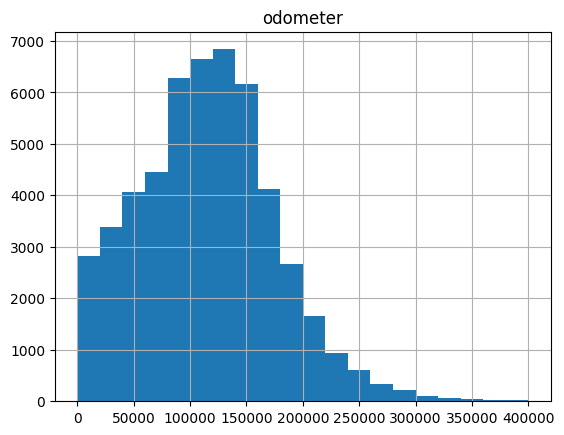

In [48]:
#traza un histograma para la columna 'odometer' con 20 intervalos y el eje x de (0, 40000)
sale_of_vehicle['odometer'].hist(bins=20, range=(0, 400000))
#le agregamos el titulo  de la columna que estamos analizando "odometer"
plt.title('odometer')
#mostramos el histograma
plt.show()


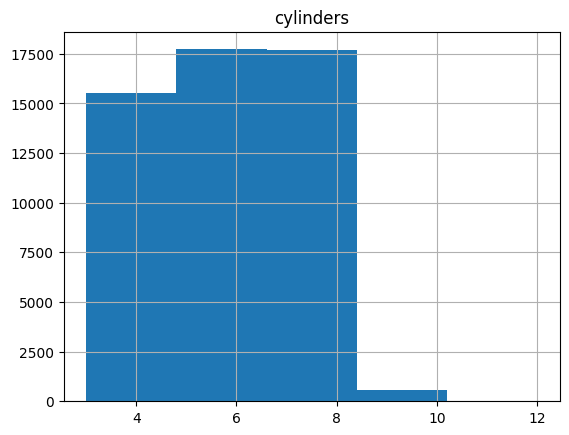

In [49]:
#traza un histograma para la columna 'cylinders' con 20 intervalos
sale_of_vehicle['cylinders'].hist(bins=5)
#le agregamos el titulo  de la columna que estamos analizando "cylinders"
plt.title('cylinders')
#mostramos el histograma
plt.show()



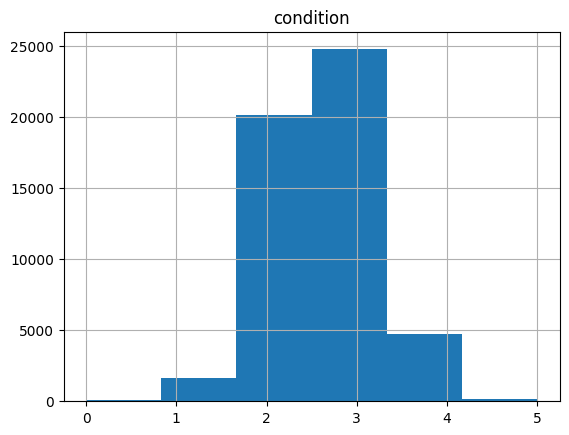

In [50]:
#traza un histograma para la columna 'condition' con 6 intervalos
sale_of_vehicle['condition'].hist(bins=6)
#le agregamos el titulo  de la columna que estamos analizando "condition"
plt.title('condition')
#mostramos el histograma
plt.show()


- En el histograma de la columna precio= (price), los intervalos empiezan a reducirse a cero y a formar una base ancha después de los 40000.
- En el histograma de la columna años_del_vehículo_posteado= (years_of_the_vehicle_posted), ocurre lo mismo después de los 30 años.
- En el histograma del la columna cuentakilómetros(odometer), empezamos a notar una cola después de 250000.
- No hay valores realmente atípicos en los demás histogramas

## Estudiar y tratar valores atípicos

In [51]:
Q1_PRICE = sale_of_vehicle["price"].quantile(0.25)
Q3_PRICE = sale_of_vehicle["price"].quantile(0.75)
IQR_PRICE = Q3_PRICE - Q1_PRICE
#limite inferior
price_quartile_lower = Q1_PRICE-1.5*IQR_PRICE
#limite superior
price_quartile_upper = Q3_PRICE+1.5*IQR_PRICE
# Determina los límites inferiores para valores atípicos
price_quartile_filtered = sale_of_vehicle.query('price > @price_quartile_lower & price < @price_quartile_upper')

#informacion general del dataframe creado
price_quartile_filtered.info(verbose=True)
price_quartile_filtered.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49863 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        49863 non-null  int64         
 1   model_year                   49863 non-null  int32         
 2   model                        49863 non-null  object        
 3   condition                    49863 non-null  int32         
 4   cylinders                    49863 non-null  int32         
 5   fuel                         49863 non-null  object        
 6   odometer                     49863 non-null  int32         
 7   transmission                 49863 non-null  object        
 8   type                         49863 non-null  object        
 9   paint_color                  49863 non-null  object        
 10  is_4wd                       49863 non-null  bool          
 11  date_posted                  49863 non-nu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


In [52]:
Q1_years_of_the_vehicle_posted = sale_of_vehicle["years_of_the_vehicle_posted"].quantile(0.25)
Q3_years_of_the_vehicle_posted = sale_of_vehicle["years_of_the_vehicle_posted"].quantile(0.75)
IQR_years_of_the_vehicle_posted = Q3_years_of_the_vehicle_posted - Q1_years_of_the_vehicle_posted
#limite inferior
years_of_the_vehicle_posted_quartile_lower = Q1_years_of_the_vehicle_posted-1.5*IQR_years_of_the_vehicle_posted
#limite superior
years_of_the_vehicle_posted_quartile_upper = Q3_years_of_the_vehicle_posted+1.5*IQR_years_of_the_vehicle_posted
years_quartile_filtered = sale_of_vehicle.query('years_of_the_vehicle_posted > @years_of_the_vehicle_posted_quartile_lower & years_of_the_vehicle_posted < @years_of_the_vehicle_posted_quartile_upper')

#informacion general del dataframe creado
years_quartile_filtered.info(verbose=True)
years_quartile_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50620 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        50620 non-null  int64         
 1   model_year                   50620 non-null  int32         
 2   model                        50620 non-null  object        
 3   condition                    50620 non-null  int32         
 4   cylinders                    50620 non-null  int32         
 5   fuel                         50620 non-null  object        
 6   odometer                     50620 non-null  int32         
 7   transmission                 50620 non-null  object        
 8   type                         50620 non-null  object        
 9   paint_color                  50620 non-null  object        
 10  is_4wd                       50620 non-null  bool          
 11  date_posted                  50620 non-nu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


In [53]:
Q1_odometer = sale_of_vehicle["odometer"].quantile(0.25)
Q3_odometer = sale_of_vehicle["odometer"].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
#limite inferior
odometer_quartile_lower = Q1_odometer-1.5*IQR_odometer
#limite superior
odometer_quartile_upper = Q3_odometer+1.5*IQR_odometer
odometer_quartile_filtered = sale_of_vehicle.query('odometer > @odometer_quartile_lower & odometer < @odometer_quartile_upper')

#informacion general del dataframe creado
odometer_quartile_filtered.info()
odometer_quartile_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50867 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        50867 non-null  int64         
 1   model_year                   50867 non-null  int32         
 2   model                        50867 non-null  object        
 3   condition                    50867 non-null  int32         
 4   cylinders                    50867 non-null  int32         
 5   fuel                         50867 non-null  object        
 6   odometer                     50867 non-null  int32         
 7   transmission                 50867 non-null  object        
 8   type                         50867 non-null  object        
 9   paint_color                  50867 non-null  object        
 10  is_4wd                       50867 non-null  bool          
 11  date_posted                  50867 non-nu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


In [54]:
Q1_cylinders = sale_of_vehicle["cylinders"].quantile(0.25)
Q3_cylinders = sale_of_vehicle["cylinders"].quantile(0.75)
IQR_cylinders = Q3_cylinders - Q1_cylinders
#limite inferior
cylinders_quartile_lower = Q1_cylinders-1.5*IQR_cylinders
#limite superior
cylinders_quartile_upper = Q3_cylinders+1.5*IQR_cylinders
cylinders_quartile_filtered = sale_of_vehicle.query('cylinders > @cylinders_quartile_lower & cylinders < @cylinders_quartile_upper')

#informacion general del dataframe creado
cylinders_quartile_filtered.info()
cylinders_quartile_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51512 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        51512 non-null  int64         
 1   model_year                   51512 non-null  int32         
 2   model                        51512 non-null  object        
 3   condition                    51512 non-null  int32         
 4   cylinders                    51512 non-null  int32         
 5   fuel                         51512 non-null  object        
 6   odometer                     51512 non-null  int32         
 7   transmission                 51512 non-null  object        
 8   type                         51512 non-null  object        
 9   paint_color                  51512 non-null  object        
 10  is_4wd                       51512 non-null  bool          
 11  date_posted                  51512 non-nu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


In [55]:
Q1_condition = sale_of_vehicle["condition"].quantile(0.25)
Q3_condition = sale_of_vehicle["condition"].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
#limite inferior
condition_quartile_lower = Q1_condition-1.5*IQR_condition
#liite superior
condition_quartile_upper = Q3_condition+1.5*IQR_condition
condition_quartile_filtered = sale_of_vehicle.query('condition > @condition_quartile_lower & condition < @condition_quartile_upper')

#informacion general del dataframe creado
condition_quartile_filtered.info()
condition_quartile_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51262 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        51262 non-null  int64         
 1   model_year                   51262 non-null  int32         
 2   model                        51262 non-null  object        
 3   condition                    51262 non-null  int32         
 4   cylinders                    51262 non-null  int32         
 5   fuel                         51262 non-null  object        
 6   odometer                     51262 non-null  int32         
 7   transmission                 51262 non-null  object        
 8   type                         51262 non-null  object        
 9   paint_color                  51262 non-null  object        
 10  is_4wd                       51262 non-null  bool          
 11  date_posted                  51262 non-nu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


In [56]:
# Determina los límites inferiores para valores atípicos
filtered_data = sale_of_vehicle.query('price > @price_quartile_lower & price < @price_quartile_upper & years_of_the_vehicle_posted > @years_of_the_vehicle_posted_quartile_lower & years_of_the_vehicle_posted < @years_of_the_vehicle_posted_quartile_upper & odometer > @odometer_quartile_lower & odometer < @odometer_quartile_upper & cylinders > @cylinders_quartile_lower & cylinders < @cylinders_quartile_upper & condition > @condition_quartile_lower & condition < @condition_quartile_upper')
#datos donde el precio es inferior a 40000, la edad es inferior a 30, y odómetro es inferior a 250000

#informacion general del dataframe creado
filtered_data.info(verbose=True)
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48204 entries, 0 to 51511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   price                        48204 non-null  int64         
 1   model_year                   48204 non-null  int32         
 2   model                        48204 non-null  object        
 3   condition                    48204 non-null  int32         
 4   cylinders                    48204 non-null  int32         
 5   fuel                         48204 non-null  object        
 6   odometer                     48204 non-null  int32         
 7   transmission                 48204 non-null  object        
 8   type                         48204 non-null  object        
 9   paint_color                  48204 non-null  object        
 10  is_4wd                       48204 non-null  bool          
 11  date_posted                  48204 non-nu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


## Estudiar parámetros principales sin valores atípicos

Ahora vamos a trazar los histogramas de los mismos parámetros para nuestra tabla filtrada - filtered_data

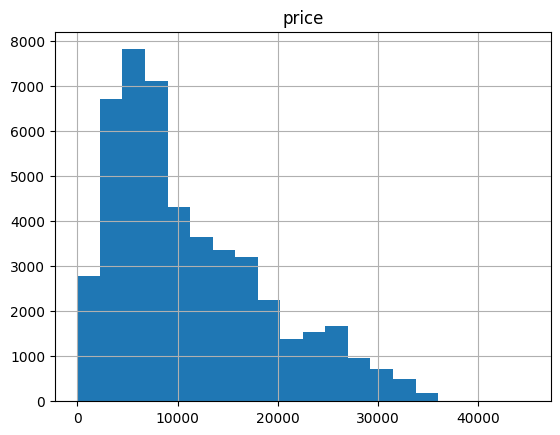

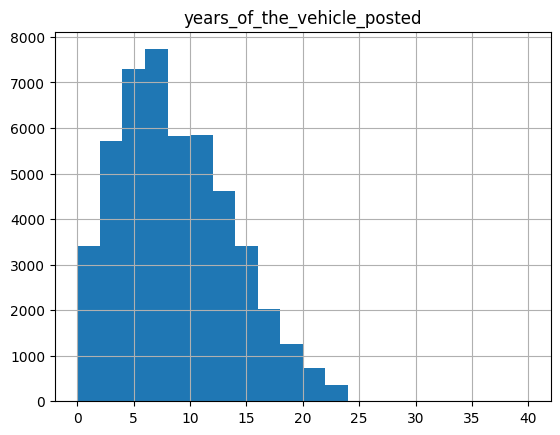

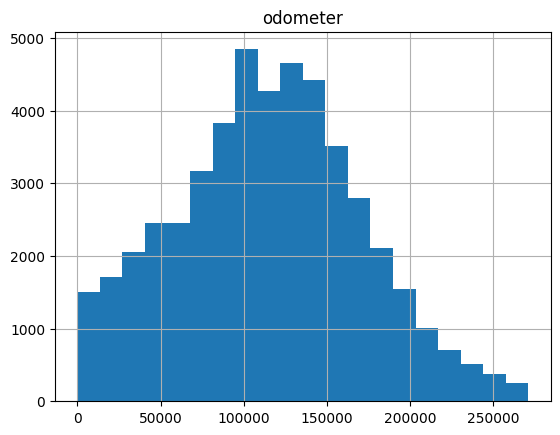

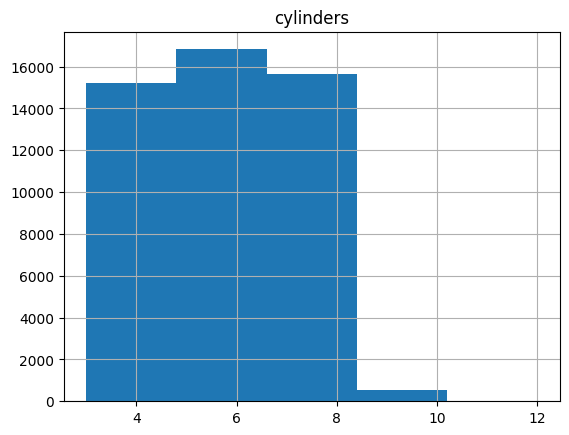

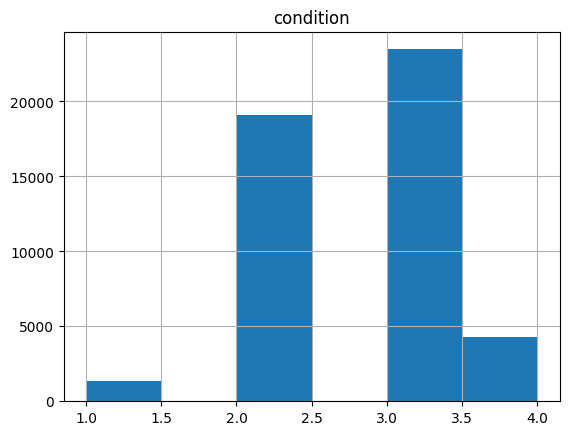

In [57]:
filtered_data['price'].hist(bins=20, range=(0, 45000))
plt.title('price')
plt.show()
filtered_data['years_of_the_vehicle_posted'].hist(bins=20, range=(0, 40))
plt.title('years_of_the_vehicle_posted')
plt.show()
filtered_data['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()
filtered_data['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()
filtered_data["condition"].hist(bins=6)
plt.title('condition')
plt.show()

- El histograma de la columna precios alcanza un máximo en 5000, tras lo cual se produce un descenso constante, aunque hay un segundo pico más pequeño en torno a 25000.
- El nuevo histograma de la años del vehículo posteado alcanza un máximo en 5, aunque hay un segundo máximo en 6 a grandes rasgos tras luego un descenso constante.
- En el nuevo histograma del odometer, el punto maximo se sitúa en torno a 100000; el pico menor se produce antes, esta vez en 125000 y las colas han desaparecido.
- La principal diferencia entre el precio, los años del vehículo posteado y el odometer del nuevo dataframe los del dataframe original es que los nuevos histogramas se observan con más ruido, ya que tratan con un dataframe más limitado. Además, las colas han desaparecido com anteriormente se menciono. Pero tienen casi los mismos picos(puntos maximos).

## Periodo de colocación de los anuncios

Vamos a hallar la media y la mediana aplicando el método describe() a la columna (**"days_listed"**)

In [58]:
filtered_data['days_listed'].describe()

count    48204.000000
mean        39.546469
std         28.224545
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

La media es de unos 39 días y la mediana de 33. Veamos ahora el histograma

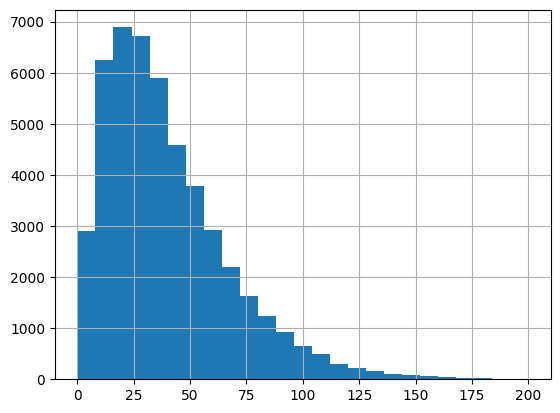

In [59]:
filtered_data['days_listed'].hist(bins=25, range=(0, 200))
plt.show()

Para describir mejor la duración típica de un anuncio, hagamos un boxplot usando la libreria de matplotlib y usando un tamaño de 8*8

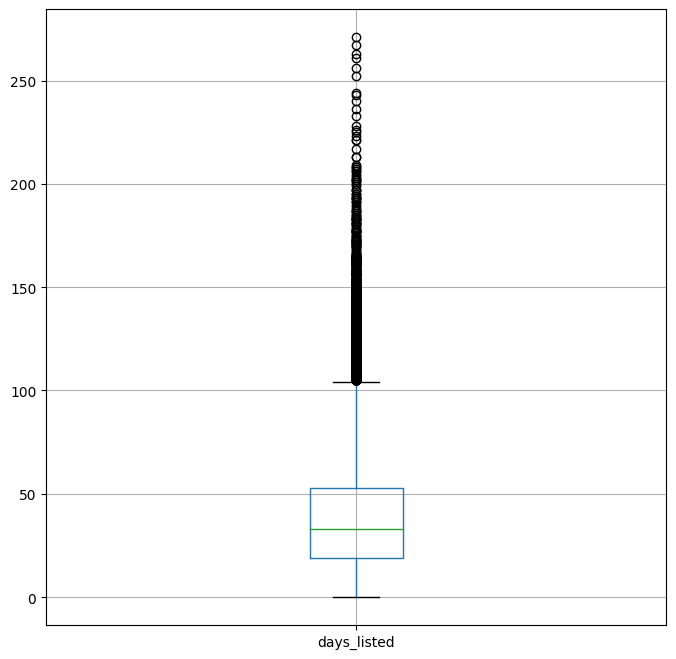

In [60]:
filtered_data.boxplot(column='days_listed', figsize=(8,8))
plt.show()

Un anuncio típico dura entre 19 y unos 50 días.
Algo anormalmente largo sería más de 100 días. Pues lo que esté entre 0 y 19 puede considerarse retirado demasiado rápido.

[Volver a Contenidos](#back)

## Precio promedio por cada tipo de vehículo

In [61]:
#crea una tabla dinámica a partir de nuestros datos filtrados con el index ='type'  y los values = "price" el precio medio
average_state_price_type = filtered_data.pivot_table(index='type', values='price', aggfunc=['count', 'median'])

#mostramos la tabla dinamica creada
average_state_price_type

,count,median
,price,price
type,,
bus,21,28990
convertible,335,12995
coupe,1996,12995
hatchback,997,5995
mini-van,1144,6500
offroad,182,12500
other,233,8995
pickup,6284,13999


In [62]:
#esto crea un dataframe utilizando los tipos como índice y sus datos individuales como valores de la columna "type"
type_ads_med_stat =filtered_data['type'].value_counts()
type_ads_med_stat

sedan          11939
suv            11885
truck          11103
pickup          6284
coupe           1996
wagon           1502
mini-van        1144
hatchback        997
van              583
convertible      335
other            233
offroad          182
bus               21
Name: type, dtype: int64

- y como podemos ver en ambas tablas tenemos el index como la columna "type" se facilitara más rapido el posicionamiento de valores correspondientes 

In [63]:
type_ads_med_stat.sort_values(ascending=False)

#mostramos la nueva tabla ya con los cambios pertinentes
type_ads_med_stat

sedan          11939
suv            11885
truck          11103
pickup          6284
coupe           1996
wagon           1502
mini-van        1144
hatchback        997
van              583
convertible      335
other            233
offroad          182
bus               21
Name: type, dtype: int64

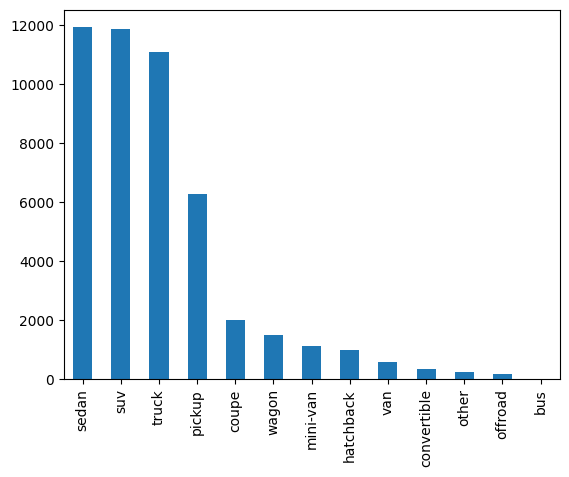

In [64]:
type_ads_med_stat.plot(kind='bar')
plt.show()

Los tipos más populares son los SUV y los sedan

## Factores de precio

- Trabajaremos con los tipos más populares y estudiémoslos.
- Para cada uno, crearemos un corte y nos centraremos las columnas **"price"**, **"years_of_the_vehicle_posted""**, **"average_vehicle_mileage"** , **"condition"**, **"transmission"** y **"paint_color"** para nuestro análisis.
- comenzaremos por trabajar con los SUV y posterior los sedan.

In [65]:
#crea un slice de las filas donde el tipo igual SUV
suv_price_factors = filtered_data.query('type == "suv"')

#delimitamos las filas que queremos en nuestra nueva tabla segun las columnas interesadas
suv_price_factors = suv_price_factors[['price', 'years_of_the_vehicle_posted', 'average_vehicle_mileage', 'condition', 'transmission', 'paint_color']]

suv_price_factors = suv_price_factors.reset_index(drop=True)
#para mostrar nuestra nueva tabla
suv_price_factors.head()#

,price,years_of_the_vehicle_posted,average_vehicle_mileage,condition,transmission,paint_color
0,9400,7,20714.285714,2,automatic,unknown
1,15990,6,18245.500000,3,automatic,black
2,11500,6,17362.333333,3,automatic,unknown
3,9200,11,13381.000000,3,automatic,blue
4,12990,10,13228.500000,3,automatic,black


Ahora vamos a hacer gráficos de caja comparando el precio con la transmisión y el color_de_la_pintura, y gráficos de dispersión para el resto

In [66]:
suv_price_factors["paint_color"].value_counts()

unknown    2138
black      2094
white      1869
silver     1528
grey       1145
blue       1010
red         870
green       418
brown       352
custom      296
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64

In [67]:
suv_price_factors = suv_price_factors.query('paint_color != "yellow" & paint_color != "purple"')
suv_price_factors

,price,years_of_the_vehicle_posted,average_vehicle_mileage,condition,transmission,paint_color
0,9400,7,20714.285714,2,automatic,unknown
1,15990,6,18245.500000,3,automatic,black
2,11500,6,17362.333333,3,automatic,unknown
3,9200,11,13381.000000,3,automatic,blue
4,12990,10,13228.500000,3,automatic,black
...,...,...,...,...,...,...
11880,9500,7,20642.857143,2,automatic,unknown
11881,4999,16,11118.812500,3,automatic,unknown
11882,6995,6,26166.666667,3,automatic,white
11883,7995,8,13886.000000,4,automatic,unknown


en la columna "transmission" podemos apreciar utilizando el metodo .value_counts() que no tenemos categorias con menos de 50 anuncions asi que solo precederemos hacer el analisis correspondinete

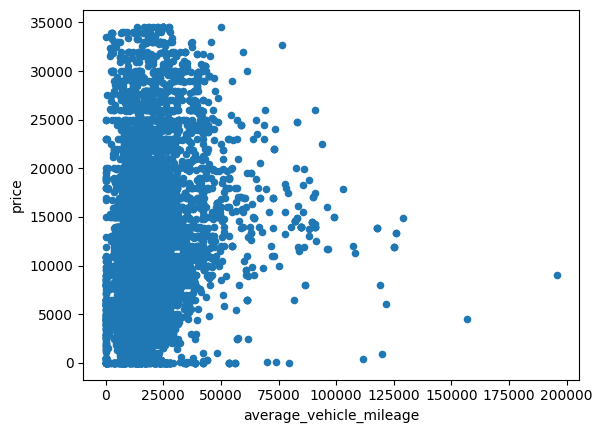

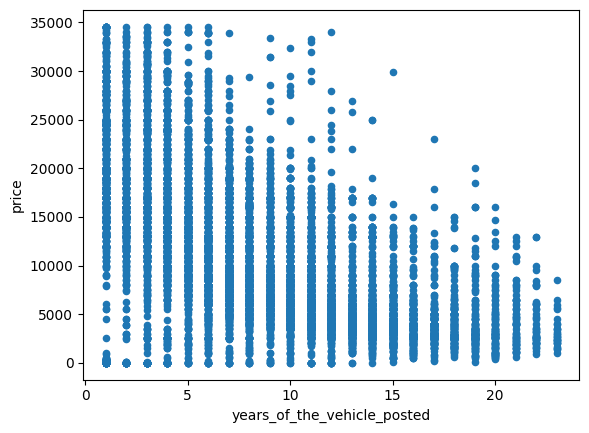

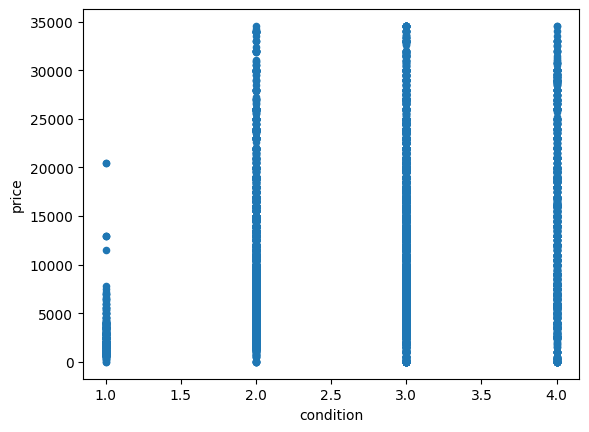

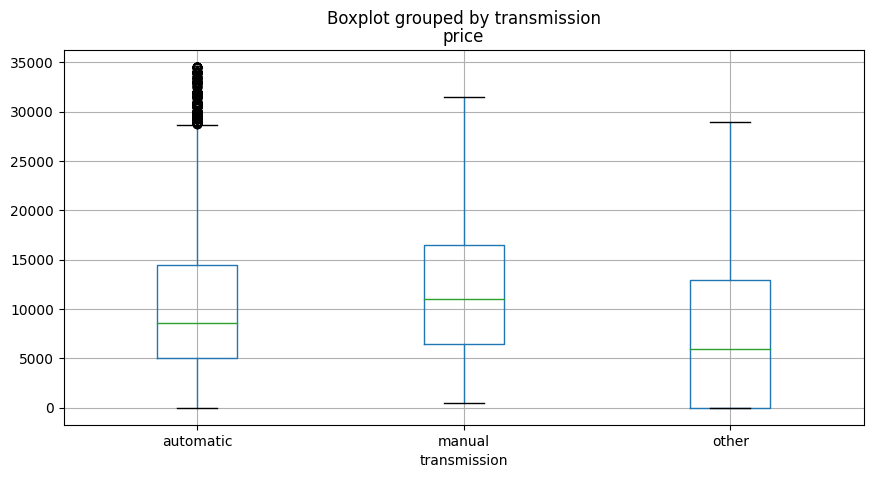

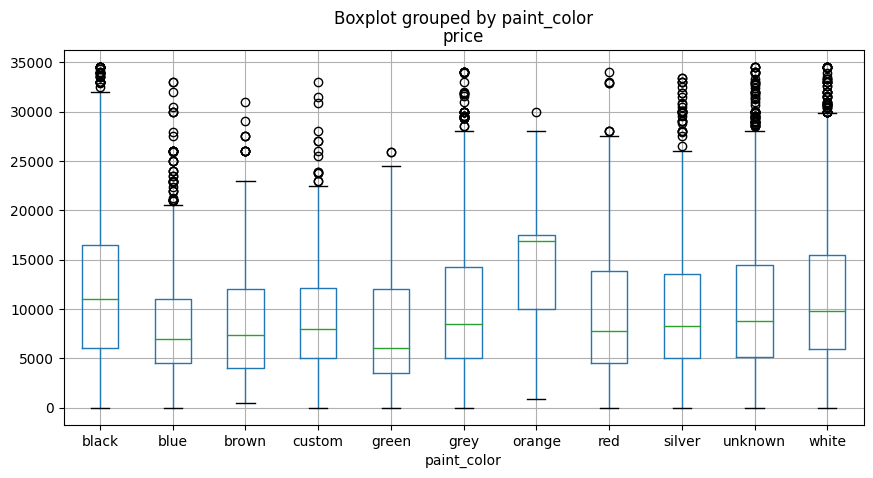

In [68]:
#crearemos un bucle for para recorre los nombres de las columnas en la lista de columnas
column_list = ["average_vehicle_mileage","years_of_the_vehicle_posted", "condition", 'transmission', 'paint_color' ]
for col in column_list:
    if (col == 'transmission')|(col == 'paint_color'):
        #crea un diagrama de cajas de 10 por 5 pulgadas comparándolo con el precio de cada una de las columnas llamadas anteriormente
        suv_price_factors.boxplot(column='price', by=col, figsize=(10, 5)) 
        plt.show()
    else:
        #crearemos gráficos de dispersión comparando con el precio las columnas "price", "years_of_the_vehicle_posted", "odometer", "condition"
        suv_price_factors.plot(x=col, y='price', kind='scatter')
        plt.show()

Hagamos también una matriz de correlaciones. Un valor más cercano a 1 o -1 muestra una fuerte dependencia, positiva o negativa. Más cercano a cero significa que hay poca o ninguna correlación o que no se puede expresar en forma lineal

In [69]:
suv_price_factors.corr()#displays correlation matrix for the suv_data table

C:\Users\USER\AppData\Local\Temp\ipykernel_18372\1404508320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  suv_price_factors.corr()#displays correlation matrix for the suv_data table


,price,years_of_the_vehicle_posted,average_vehicle_mileage,condition
price,1.000000,-0.579972,0.260063,0.258300
years_of_the_vehicle_posted,-0.579972,1.000000,-0.554214,-0.329055
average_vehicle_mileage,0.260063,-0.554214,1.000000,0.077353
condition,0.258300,-0.329055,0.077353,1.000000


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Perfecta tabla de correlaciones.    
</div>

De la matriz de correlaciones se desprende que la columna **"years_of_the_vehicle_posted"** es el factor que más influye en el precio, seguida de la columna "average_vehicle_mileage" (ambos negativos). La columna **"condition"** tiene una moderada correlación que pueda expresarse de forma lineal. De los diagramas de caja se desprende que los SUV amarillos y los SUV con transmisión manual tienen precios típicos más altos en sus respectivas categorías.

---

In [70]:
sedan_price_factors = filtered_data.query('type == "sedan"')
sedan_price_factors = sedan_price_factors[['price', 'years_of_the_vehicle_posted', 'average_vehicle_mileage', 'condition', 'transmission', 'paint_color']]
sedan_price_factors = sedan_price_factors.reset_index(drop=True)
sedan_price_factors.head()

,price,years_of_the_vehicle_posted,average_vehicle_mileage,condition,transmission,paint_color
0,5500,6,18333.333333,4,automatic,red
1,14900,2,40451.500000,3,automatic,black
2,14990,4,14488.500000,3,automatic,black
3,12990,3,26404.000000,3,automatic,white
4,8990,7,15877.428571,3,automatic,grey


<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

Haz la revisión del no. de anuncios por categoría para `sedan_price_factors`, como te dije ya para el caso de los autos suv.</div>

In [71]:
sedan_price_factors["paint_color"].value_counts()

unknown    2148
silver     2023
black      1748
grey       1602
white      1476
blue       1213
red         928
custom      292
brown       253
green       202
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64

In [72]:
sedan_price_factors["transmission"].value_counts()

automatic    11235
manual         573
other          131
Name: transmission, dtype: int64

In [73]:
sedan_price_factors = sedan_price_factors.query('paint_color != "purple" & paint_color != "yellow" & paint_color != "orange"')
sedan_price_factors

,price,years_of_the_vehicle_posted,average_vehicle_mileage,condition,transmission,paint_color
0,5500,6,18333.333333,4,automatic,red
1,14900,2,40451.500000,3,automatic,black
2,14990,4,14488.500000,3,automatic,black
3,12990,3,26404.000000,3,automatic,white
4,8990,7,15877.428571,3,automatic,grey
...,...,...,...,...,...,...
11934,3750,13,8476.923077,3,automatic,silver
11935,9249,5,17627.200000,4,automatic,black
11936,3950,9,14222.222222,3,automatic,blue
11937,7455,5,27914.600000,2,automatic,black


In [74]:
sedan_price_factors["paint_color"].value_counts()

unknown    2148
silver     2023
black      1748
grey       1602
white      1476
blue       1213
red         928
custom      292
brown       253
green       202
Name: paint_color, dtype: int64

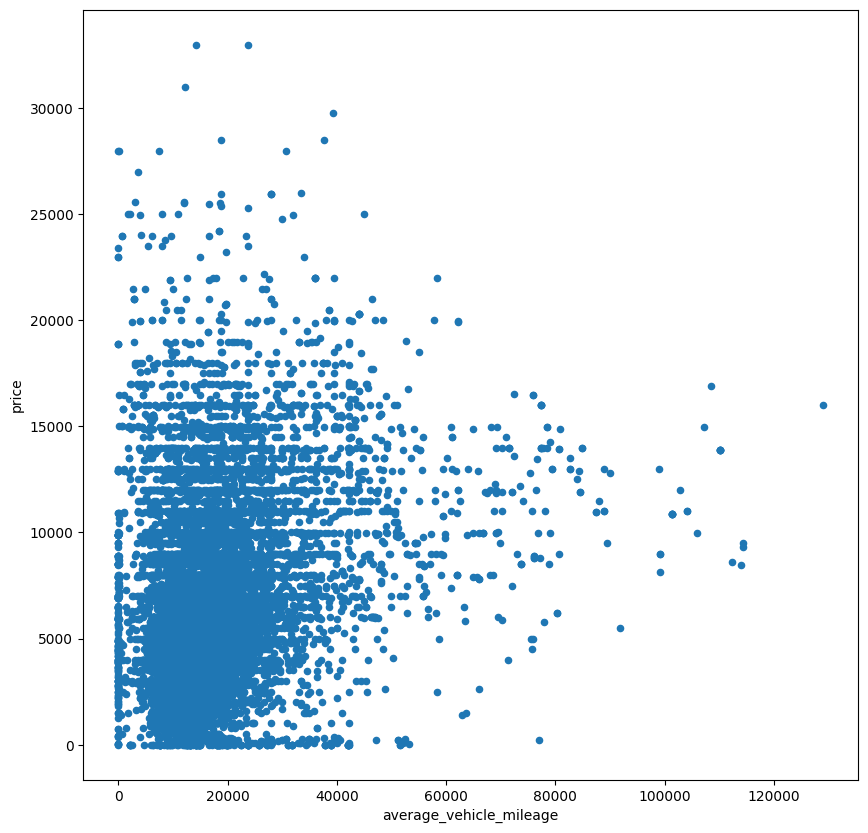

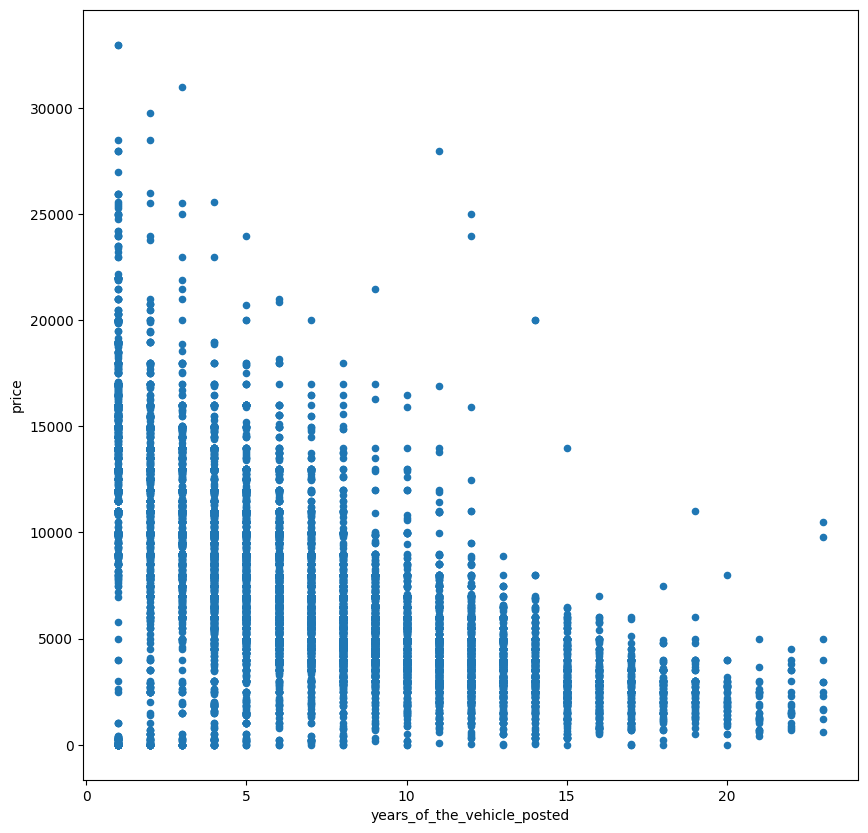

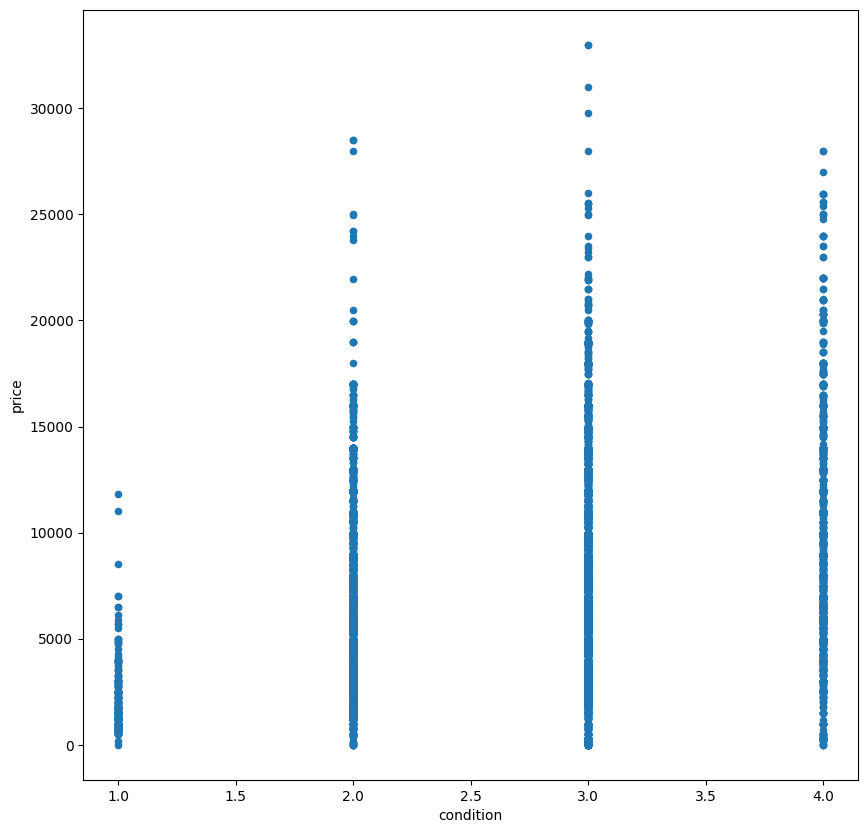

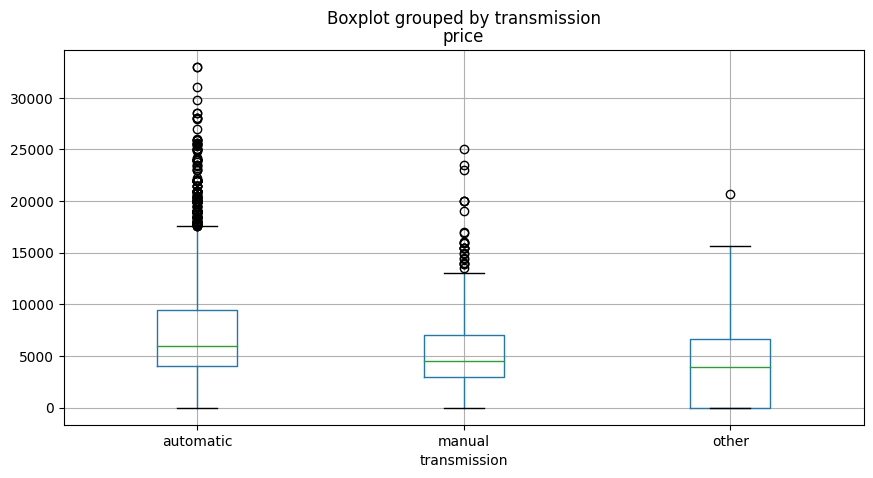

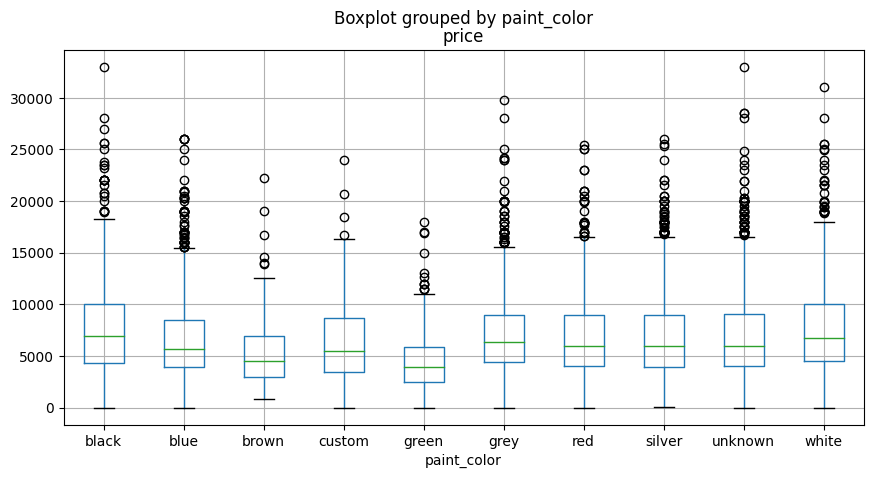

In [75]:
column_list = ["average_vehicle_mileage","years_of_the_vehicle_posted", "condition", 'transmission', 'paint_color' ]
for col in column_list:
    if (col == 'transmission')|(col == 'paint_color'):
        sedan_price_factors.boxplot(column='price', by=col, figsize=(10, 5))
        plt.show()
    else:
        sedan_price_factors.plot(x=col, y='price', kind='scatter', figsize=(10, 10))
        plt.show()

In [76]:
sedan_price_factors.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_18372\4049018707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sedan_price_factors.corr()


,price,years_of_the_vehicle_posted,average_vehicle_mileage,condition
price,1.000000,-0.618250,0.270404,0.290409
years_of_the_vehicle_posted,-0.618250,1.000000,-0.532741,-0.319304
average_vehicle_mileage,0.270404,-0.532741,1.000000,0.075261
condition,0.290409,-0.319304,0.075261,1.000000


A partir de la matriz de correlaciones, la columna **"years_of_the_vehicle_posted"** sigue teniendo la mayor correlación con el precio, seguida de la columna **"average_vehicle_mileage"** (ambos negativos). En los gráficos diagramas de caja, los sedan color  de pintura naranja y los sedan con transmisión automática tienen los precios típicos más altos de sus respectivas categorías.

In [77]:
sale_of_vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,years_of_the_vehicle_posted,average_vehicle_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11750.000000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000


## Conclusión general

Valores ausentes
1. La columna **"is_4wd"** Asi que trabajaremos con esta columna convirtiendo los valores ausentes de la manera que usaremos el metodo .where() de tal manera que sustituiremos los valores ausentes por 0 y asi tendremos solo dos valores unicos 1 si es 4x4 y 0 indicandonos que no es 4x4. 
Después de lo cual podemos convertir la columna a una columna booleana, 1 se convertirá en "True" y 0 se convertirá en "False".
2. La columna **"model_year"** se creo una funcion que compruebe si existen valores ausentes en nuestras filas de la columna **"model_year"**. Una vez encontrados los sustituira por la mediana de la agrupacion **"model"** y **"condition"**; dandonos solo 6 valores ausentes con el metodo .dropna() y procediendo a eliminarlos ya que no afecta mucho a nuestro análisis.
3. La columna **"odometer"** A continuación, podemos aplicar una función que compruebe si existen valores ausentes en nuestras filas de la columna **"odometer"**. Cuando encuentre uno, comprobará el año del modelo (**"model_year"**) y la condición(**"condition"**) y, a continuación, devolverá el valor mediano de la columna **"odometer"** para la combinación año del modelo y condición de nuestros datos agrupados ya anteriormente; dandonos solo 7 valores ausentes con el metodo .dropna() y procediendo a eliminarlos.
4. La columna **"cylinders"** de nuevo utilizaremos la mediana, tenemos que tener en cuenta que el número de cilindros la columna (**"cylinders"**) depende del modelo de coche la columna (**"model"**). Aplicaremos el mismo principio que con la columna del **"model_year"** haremos una agrupación para sacar la mediana mas conveniente y asi rellenar los valores ausentes.
5. La columna "paint_color" ya que es categorica solo sustituimos los valores ausentes con el metodo .fillna() por la palabra "unknown" y asi desaciendonos de los valores ausentes.

1. Hemos trazado histogramas para nuestro dataframe original y los dataframe filtrados filtrados.
2. Vimos que el anuncio típico dura entre 19 y 50 días, y los que duran más de 100 días son anormalmente largos. Tomamos los dos tipos de vehículos con mayor número de anuncios para crear gráficos de caja, de dispersión y matrices de correlación.En base a eso llegamos a la conclusión de que el factor que más influye en el precio es la antiguedad la columna(**"years_of_the_vehicle_posted"**), seguido del kilometraje la columna(**"odometer"**).
3. También vimos que, en el caso de los SUV, el naranja era el color con los precios típicos más altos y que la transmisión manual superaba a la automática en precios.
4. En el caso de los sedan, el negro fue el color que hizo subir los precios típicos, y la transmisión automática se cotizó más cara que la manual.